In [972]:
from Cryptodome.PublicKey import ECC
key = ECC.generate(curve='P-256')
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/keys/private_key.pem', 'w') as f:
    f.write(key.export_key(format='PEM'))

with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/keys/public_key.pem', 'w') as f:
    f.write(key.public_key().export_key(format='PEM'))

In [973]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import random
import string
from Cryptodome.Cipher import AES

Text(0.5, 1.0, 'Original Audio Plot')

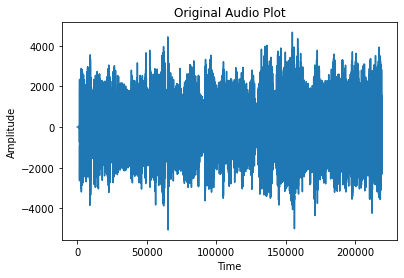

In [974]:
fs, data = wavfile.read('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/originals/clip1.wav')
plt.plot(data)            
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.title("Original Audio Plot")

In [975]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/originals/clip1.wav', 'rb') as fd:
    contents = fd.read()
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/keys/private_key.pem', 'r') as f:
    key = ECC.import_key(f.read())
print(key)

EccKey(curve='NIST P-256', point_x=17761166330042473809204711481702218420338470978796684770906362101506173525123, point_y=97398385431401885401756534130668256939129038738121913772011329855050338285416, d=46072706226225630710522741645587287489088209337152846447207200783184246356254)


In [976]:
AES_KEY = key.pointQ.x.to_bytes(32, byteorder='big')

AES_IV = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(16))
print("AES Key is ", AES_KEY)
print("AES Initialization vector is ", AES_IV)

AES Key is  b"'Dv\xc1\xf2\xa0Q\xf7\x7fc\xf8\xa9\xaec\xd3&\x12\xe3CI\x88\xc3\x961\xb3\x87\xe1\x0c\xd1C\\\x83"
AES Initialization vector is  x5NnDssdkjieuUz1


In [977]:
import time
start = time.time()
encryptor = AES.new(AES_KEY, AES.MODE_CFB, AES_IV.encode("utf-8"))
encrypted_audio = encryptor.encrypt(contents)
encrypt_duration1 = time.time() - start
print(f"File has been encrypted in {encrypt_duration1*1000} milliseconds")

File has been encrypted in 14.001846313476562 milliseconds


In [978]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/encrypted/enc_1.wav', 'wb') as fd:
    fd.write(encrypted_audio)
print("The encrypted file has been generated in the /encrypted directory.")

The encrypted file has been generated in the /encrypted directory.


In [979]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/encrypted/enc_1.wav', 'rb') as fd:
    contents = fd.read()
import time
start2 = time.time()
decryptor = AES.new(AES_KEY, AES.MODE_CFB, AES_IV.encode("utf-8"))
decrypted_audio = decryptor.decrypt(contents)
decrypt_duration1 = time.time() - start2
print(f"File has been decrypted in {decrypt_duration1*1000} milliseconds")

File has been decrypted in 12.00103759765625 milliseconds


In [980]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/decrypted/denc_1.wav', 'wb') as fd:
    fd.write(decrypted_audio)
print("The decrypted file has been generated in the /decrypted directory.")

The decrypted file has been generated in the /decrypted directory.


Encryption time:  14.001846313476562 milliseconds
Decryption time:  12.00103759765625 milliseconds


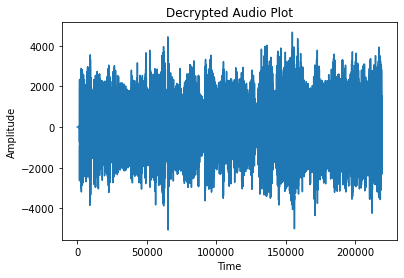

In [981]:
fs, data = wavfile.read('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/decrypted/denc_1.wav')
plt.plot(data)  
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Decrypted Audio Plot")
data_1 = np.asarray(data, dtype = np.int32)
print("Encryption time: ", encrypt_duration1*1000, "milliseconds")
print("Decryption time: ", decrypt_duration1*1000, "milliseconds")

Text(0.5, 1.0, 'Original Audio Plot')

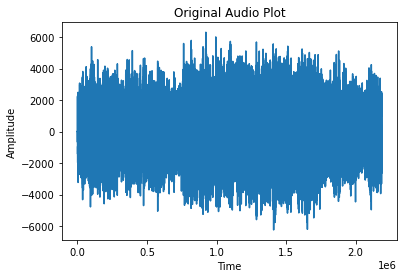

In [982]:
fs, data = wavfile.read('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/originals/clip2.wav')
plt.plot(data)            
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.title("Original Audio Plot")

In [983]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/originals/clip2.wav', 'rb') as fd:
    contents = fd.read()
AES_KEY = key.pointQ.x.to_bytes(32, byteorder='big')
AES_IV = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(16))
print("AES Key is ", AES_KEY)
print("AES Initialization vector is ", AES_IV)

AES Key is  b"'Dv\xc1\xf2\xa0Q\xf7\x7fc\xf8\xa9\xaec\xd3&\x12\xe3CI\x88\xc3\x961\xb3\x87\xe1\x0c\xd1C\\\x83"
AES Initialization vector is  OWEcIF7hzqFIWeoR


In [984]:
start = time.time()
encryptor = AES.new(AES_KEY, AES.MODE_CFB, AES_IV.encode("utf-8"))
encrypted_audio = encryptor.encrypt(contents)
encrypt_duration2 = time.time() - start
print(f"File has been encrypted in {encrypt_duration2*1000} milliseconds")

File has been encrypted in 105.50093650817871 milliseconds


In [985]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/encrypted/enc_2.wav', 'wb') as fd:
    fd.write(encrypted_audio)
print("The encrypted file has been generated in the /encrypted directory.")

The encrypted file has been generated in the /encrypted directory.


In [986]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/encrypted/enc_2.wav', 'rb') as fd:
    contents = fd.read()
import time
start2 = time.time()
decryptor = AES.new(AES_KEY, AES.MODE_CFB, AES_IV.encode("utf-8"))
decrypted_audio = decryptor.decrypt(contents)
decrypt_duration2 = time.time() - start2
print(f"File has been decrypted in {decrypt_duration2*1000} milliseconds")

File has been decrypted in 105.31949996948242 milliseconds


In [987]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/decrypted/denc_2.wav', 'wb') as fd:
    fd.write(decrypted_audio)
print("The decrypted file has been generated in the /decrypted directory.")

The decrypted file has been generated in the /decrypted directory.


Encryption time:  105.50093650817871 milliseconds
Decryption time:  105.31949996948242 milliseconds


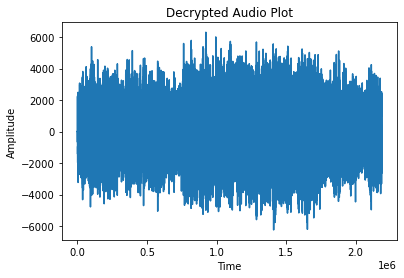

In [988]:
fs, data = wavfile.read('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/decrypted/denc_2.wav')
plt.plot(data)  
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Decrypted Audio Plot")
data_1 = np.asarray(data, dtype = np.int32)
print("Encryption time: ", encrypt_duration2*1000, "milliseconds")
print("Decryption time: ", decrypt_duration2*1000, "milliseconds")

Text(0.5, 1.0, 'Original Audio Plot')

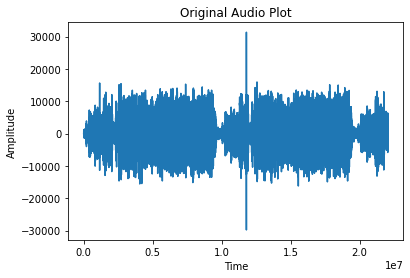

In [989]:
fs, data = wavfile.read('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/originals/clip3.wav')
plt.plot(data)            
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.title("Original Audio Plot")

In [990]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/originals/clip3.wav', 'rb') as fd:
    contents = fd.read()
AES_KEY = key.pointQ.x.to_bytes(32, byteorder='big')
AES_IV = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(16))
print("AES Key is ", AES_KEY)
print("AES Initialization vector is ", AES_IV)

AES Key is  b"'Dv\xc1\xf2\xa0Q\xf7\x7fc\xf8\xa9\xaec\xd3&\x12\xe3CI\x88\xc3\x961\xb3\x87\xe1\x0c\xd1C\\\x83"
AES Initialization vector is  iDMyAvm5To5Mr8PK


In [991]:
start = time.time()
encryptor = AES.new(AES_KEY, AES.MODE_CFB, AES_IV.encode("utf-8"))
encrypted_audio = encryptor.encrypt(contents)
encrypt_duration3 = time.time() - start
print(f"File has been encrypted in {encrypt_duration3*1000} milliseconds")

File has been encrypted in 1061.8250370025635 milliseconds


In [992]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/encrypted/enc_3.wav', 'wb') as fd:
    fd.write(encrypted_audio)
print("The encrypted file has been generated in the /encrypted directory.")

The encrypted file has been generated in the /encrypted directory.


In [993]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/encrypted/enc_3.wav', 'rb') as fd:
    contents = fd.read()
import time
start2 = time.time()
decryptor = AES.new(AES_KEY, AES.MODE_CFB, AES_IV.encode("utf-8"))
decrypted_audio = decryptor.decrypt(contents)
decrypt_duration3 = time.time() - start2
print(f"File has been decrypted in {decrypt_duration3*1000} milliseconds")

File has been decrypted in 1060.8937740325928 milliseconds


In [994]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/decrypted/denc_3.wav', 'wb') as fd:
    fd.write(decrypted_audio)
print("The decrypted file has been generated in the /decrypted directory.")

The decrypted file has been generated in the /decrypted directory.


Encryption time:  1061.8250370025635 milliseconds
Decryption time:  1060.8937740325928 milliseconds


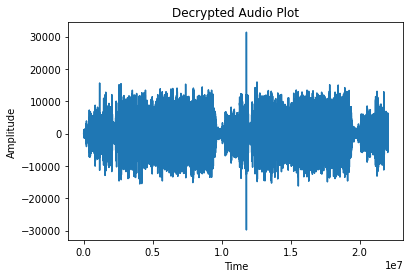

In [995]:
fs, data = wavfile.read('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/decrypted/denc_3.wav')
plt.plot(data)  
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Decrypted Audio Plot")
data_1 = np.asarray(data, dtype = np.int32)
print("Encryption time: ", encrypt_duration3*1000, "milliseconds")
print("Decryption time: ", decrypt_duration3*1000, "milliseconds")

In [996]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

filename = 'C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/decrypted/denc_1.wav'
sample_rate, signal = wavfile.read(filename)

signal_power = np.sum(signal ** 2) / len(signal)

noise = signal - np.mean(signal)
noise_power = np.sum(noise ** 2) / len(noise)

snr1 = 10 * np.log10(abs(signal_power)/ noise_power)

print("The Signal to Noise Ratio of the Decrypted Audio Clip 1 is: ", snr1)

The Signal to Noise Ratio of the Decrypted Audio Clip 1 is:  -29.918036263668803


In [997]:
filename = 'C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/decrypted/denc_2.wav'
sample_rate, signal = wavfile.read(filename)

signal_power = np.sum(signal ** 2) / len(signal)

noise = signal - np.mean(signal)
noise_power = np.sum(noise ** 2) / len(noise)

snr2 = 10 * np.log10(abs(signal_power)/ noise_power)

print("The Signal to Noise Ratio of the Decrypted Audio Clip 2 is: ", snr2)

The Signal to Noise Ratio of the Decrypted Audio Clip 2 is:  -31.79753226595519


In [998]:
filename = 'C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/decrypted/denc_3.wav'
sample_rate, signal = wavfile.read(filename)

signal_power = np.sum(signal ** 2) / len(signal)

noise = signal - np.mean(signal)
noise_power = np.sum(noise ** 2) / len(noise)

snr3 = 10 * np.log10(abs(signal_power)/ noise_power)

print("The Signal to Noise Ratio of the Decrypted Audio Clip 3 is: ", snr3)

The Signal to Noise Ratio of the Decrypted Audio Clip 3 is:  -46.55742197044441


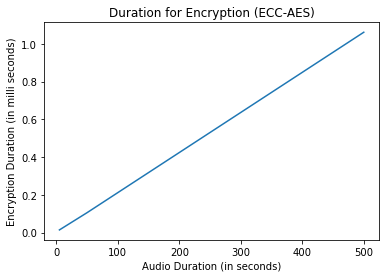

In [999]:
x_axis = [5, 50, 500]
y_axis = [encrypt_duration1, encrypt_duration2, encrypt_duration3]

plt.plot(x_axis, y_axis)
plt.title('Duration for Encryption (ECC-AES)')
plt.xlabel('Audio Duration (in seconds)')
plt.ylabel('Encryption Duration (in milli seconds)')
plt.show()

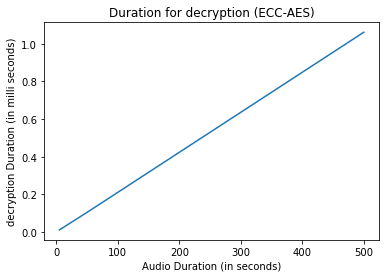

In [1000]:
x_axis = [5, 50, 500]
y_axis = [decrypt_duration1, decrypt_duration2, decrypt_duration3]

plt.plot(x_axis, y_axis)
plt.title('Duration for decryption (ECC-AES)')
plt.xlabel('Audio Duration (in seconds)')
plt.ylabel('decryption Duration (in milli seconds)')
plt.show()

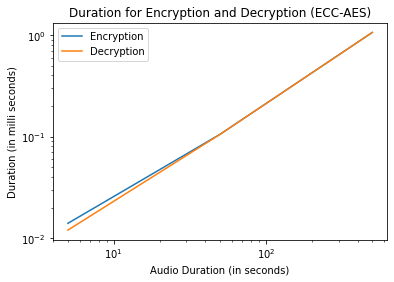

In [1001]:
x_axis = [5, 50, 500]
encrypt_y_axis = [encrypt_duration1, encrypt_duration2, encrypt_duration3]
decrypt_y_axis = [decrypt_duration1, decrypt_duration2, decrypt_duration3]

plt.plot(x_axis, encrypt_y_axis, label='Encryption')
plt.plot(x_axis, decrypt_y_axis, label='Decryption')
plt.title('Duration for Encryption and Decryption (ECC-AES)')
plt.xlabel('Audio Duration (in seconds)')
plt.ylabel('Duration (in milli seconds)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()


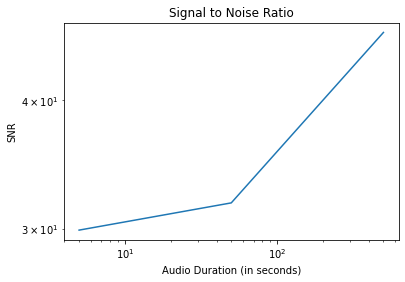

In [1002]:
x_axis = [5, 50, 500]
y_axis = [abs(snr1), abs(snr2), abs(snr3)]

plt.plot(x_axis, y_axis)
plt.title('Signal to Noise Ratio')
plt.xlabel('Audio Duration (in seconds)')
plt.ylabel('SNR')
plt.yscale('log')
plt.xscale('log')
plt.show()

In [1003]:
from IPython.core.display import HTML

HTML("<p style='font-size:36px'>DES</p>")


Text(0.5, 1.0, 'Original Audio Plot')

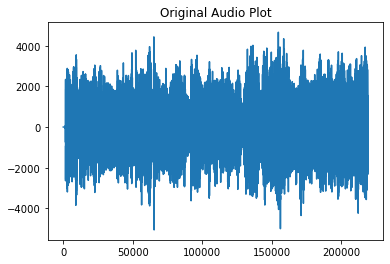

In [1004]:
from Cryptodome.Cipher import DES
fs, data = wavfile.read('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/originals/clip1.wav')
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/originals/clip1.wav', 'rb') as fd:
    contents = fd.read()
plt.plot(data)            
plt.title("Original Audio Plot")

In [1005]:
DES_KEY = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(8)) #x=64 bits #key=64 64BITS/8=8 BYTE

DES_IV = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(8))
print("DES Key is ", DES_KEY)
print("DES Initialization vector is ", DES_IV)

DES Key is  GZVmC3wv
DES Initialization vector is  Iv2ArV0W


In [1006]:
start = time.time()
encryptor = DES.new(DES_KEY.encode("utf-8"), DES.MODE_CFB, DES_IV.encode("utf-8"))
des_encrypted_audio1 = encryptor.encrypt(contents)
des_encrypt_duration1 = time.time() - start
print(f"File has been encrypted in {des_encrypt_duration1*1000} milliseconds")

File has been encrypted in 39.595842361450195 milliseconds


In [1007]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/DES/encrypted/enc_1.wav', 'wb') as fd:
    fd.write(des_encrypted_audio1)
print("The encrypted file has been generated in the DES/encrypted directory.")

The encrypted file has been generated in the DES/encrypted directory.


In [1008]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/DES/encrypted/enc_1.wav', 'rb') as fd:
    contents = fd.read()
start2 = time.time()
decryptor = DES.new(DES_KEY.encode("utf-8"), DES.MODE_CFB, DES_IV.encode("utf-8"))
des_decrypted_audio1 = decryptor.decrypt(contents)
des_decrypt_duration1 = time.time() - start2
print(f"File has been decrypted in {des_decrypt_duration1*1000} milliseconds")

File has been decrypted in 40.02976417541504 milliseconds


In [1009]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/DES/decrypted/denc_1.wav', 'wb') as fd:
    fd.write(des_decrypted_audio1)
print("The encrypted file has been generated in the DES/decrypted directory.")

The encrypted file has been generated in the DES/decrypted directory.


Encryption time:  39.595842361450195 milliseconds
Decryption time:  40.02976417541504 milliseconds


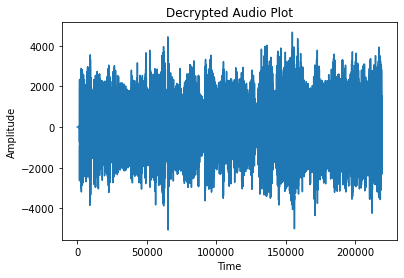

In [1010]:
fs, data = wavfile.read('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/DES/decrypted/denc_1.wav')
plt.plot(data)  
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Decrypted Audio Plot")
data_1 = np.asarray(data, dtype = np.int32)
print("Encryption time: ", des_encrypt_duration1*1000, "milliseconds")
print("Decryption time: ", des_decrypt_duration1*1000, "milliseconds")

Text(0.5, 1.0, 'Original Audio Plot')

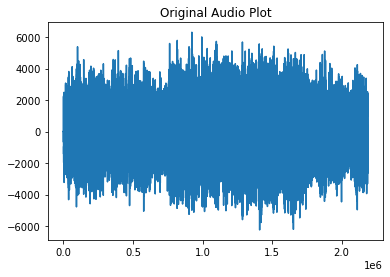

In [1011]:
fs, data = wavfile.read('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/originals/clip2.wav')
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/originals/clip2.wav', 'rb') as fd:
    contents = fd.read()
plt.plot(data)            
plt.title("Original Audio Plot")

In [1012]:
DES_KEY = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(8)) #x=64 bits #key=64 64BITS/8=8 BYTE

DES_IV = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(8))
print("DES Key is ", DES_KEY)
print("DES Initialization vector is ", DES_IV)

DES Key is  G6Gh1VvU
DES Initialization vector is  jSkXjmgv


In [1013]:
start = time.time()
encryptor = DES.new(DES_KEY.encode("utf-8"), DES.MODE_CFB, DES_IV.encode("utf-8"))
des_encrypted_audio2 = encryptor.encrypt(contents)
des_encrypt_duration2 = time.time() - start
print(f"File has been encrypted in {des_encrypt_duration2*1000} milliseconds")

File has been encrypted in 401.28040313720703 milliseconds


In [1014]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/DES/encrypted/enc_2.wav', 'wb') as fd:
    fd.write(des_encrypted_audio2)
print("The encrypted file has been generated in the DES/encrypted directory.")

The encrypted file has been generated in the DES/encrypted directory.


In [1015]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/DES/encrypted/enc_2.wav', 'rb') as fd:
    contents = fd.read()
start2 = time.time()
decryptor = DES.new(DES_KEY.encode("utf-8"), DES.MODE_CFB, DES_IV.encode("utf-8"))
des_decrypted_audio2 = decryptor.decrypt(contents)
des_decrypt_duration2 = time.time() - start2
print(f"File has been decrypted in {des_decrypt_duration2*1000} milliseconds")

File has been decrypted in 389.53685760498047 milliseconds


In [1016]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/DES/decrypted/denc_2.wav', 'wb') as fd:
    fd.write(des_decrypted_audio2)
print("The encrypted file has been generated in the DES/decrypted directory.")

The encrypted file has been generated in the DES/decrypted directory.


Encryption time:  401.28040313720703 milliseconds
Decryption time:  389.53685760498047 milliseconds


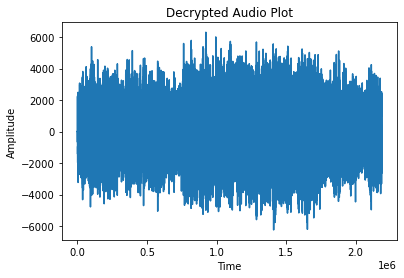

In [1017]:
fs, data = wavfile.read('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/DES/decrypted/denc_2.wav')
plt.plot(data)  
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Decrypted Audio Plot")
data_1 = np.asarray(data, dtype = np.int32)
print("Encryption time: ", des_encrypt_duration2*1000, "milliseconds")
print("Decryption time: ", des_decrypt_duration2*1000, "milliseconds")

Text(0.5, 1.0, 'Original Audio Plot')

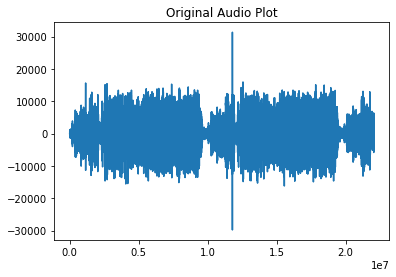

In [1018]:
fs, data = wavfile.read('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/originals/clip3.wav')
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/originals/clip3.wav', 'rb') as fd:
    contents = fd.read()
plt.plot(data)            
plt.title("Original Audio Plot")

In [1019]:
DES_KEY = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(8)) #x=64 bits #key=64 64BITS/8=8 BYTE

DES_IV = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(8))
print("DES Key is ", DES_KEY)
print("DES Initialization vector is ", DES_IV)

DES Key is  h36njKCE
DES Initialization vector is  sU1hdrmv


In [1020]:
start = time.time()
encryptor = DES.new(DES_KEY.encode("utf-8"), DES.MODE_CFB, DES_IV.encode("utf-8"))
des_encrypted_audio3 = encryptor.encrypt(contents)
des_encrypt_duration3 = time.time() - start
print(f"File has been encrypted in {des_encrypt_duration3*1000} milliseconds")

File has been encrypted in 4070.469379425049 milliseconds


In [1021]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/DES/encrypted/enc_3.wav', 'wb') as fd:
    fd.write(des_encrypted_audio3)
print("The encrypted file has been generated in the DES/encrypted directory.")

The encrypted file has been generated in the DES/encrypted directory.


In [1022]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/DES/encrypted/enc_3.wav', 'rb') as fd:
    contents = fd.read()
start2 = time.time()
decryptor = DES.new(DES_KEY.encode("utf-8"), DES.MODE_CFB, DES_IV.encode("utf-8"))
des_decrypted_audio3 = decryptor.decrypt(contents)
des_decrypt_duration3 = time.time() - start2
print(f"File has been decrypted in {des_decrypt_duration3*1000} milliseconds")

File has been decrypted in 4036.318302154541 milliseconds


In [1023]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/DES/decrypted/denc_3.wav', 'wb') as fd:
    fd.write(des_decrypted_audio3)
print("The encrypted file has been generated in the DES/decrypted directory.")

The encrypted file has been generated in the DES/decrypted directory.


Encryption time:  4070.469379425049 milliseconds
Decryption time:  4036.318302154541 milliseconds


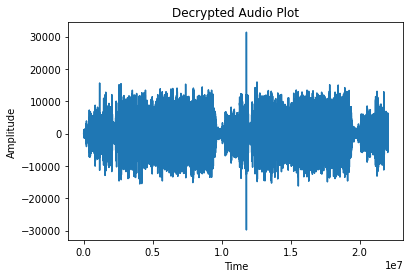

In [1024]:
fs, data = wavfile.read('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/DES/decrypted/denc_3.wav')
plt.plot(data)  
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Decrypted Audio Plot")
data_1 = np.asarray(data, dtype = np.int32)
print("Encryption time: ", des_encrypt_duration3*1000, "milliseconds")
print("Decryption time: ", des_decrypt_duration3*1000, "milliseconds")

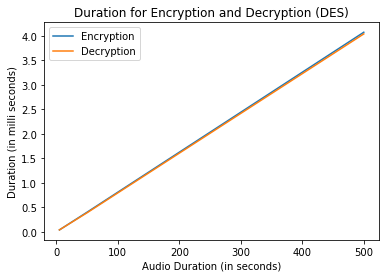

In [1025]:
x_axis = [5, 50, 500]
encrypt_y_axis = [des_encrypt_duration1, des_encrypt_duration2, des_encrypt_duration3]
decrypt_y_axis = [des_decrypt_duration1, des_decrypt_duration2, des_decrypt_duration3]

plt.plot(x_axis, encrypt_y_axis, label='Encryption')
plt.plot(x_axis, decrypt_y_axis, label='Decryption')
plt.title('Duration for Encryption and Decryption (DES)')
plt.xlabel('Audio Duration (in seconds)')
plt.ylabel('Duration (in milli seconds)')
plt.legend()
plt.show()

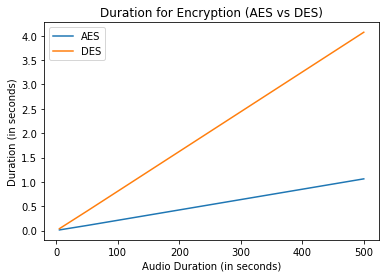

In [1026]:
x_axis = [5, 50, 500]
aes_encrypt_y_axis = [encrypt_duration1, encrypt_duration2, encrypt_duration3]
des_encrypt_y_axis = [des_encrypt_duration1, des_encrypt_duration2, des_encrypt_duration3]

plt.plot(x_axis, aes_encrypt_y_axis, label='AES')
plt.plot(x_axis, des_encrypt_y_axis, label='DES')
plt.title('Duration for Encryption (AES vs DES)')
plt.xlabel('Audio Duration (in seconds)')
plt.ylabel('Duration (in seconds)')
plt.legend()
plt.show()

In [1027]:
filename = 'C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/DES/decrypted/denc_1.wav'
sample_rate, signal = wavfile.read(filename)

signal_power = np.sum(signal ** 2) / len(signal)

noise = signal - np.mean(signal)
noise_power = np.sum(noise ** 2) / len(noise)

snr1 = 10 * np.log10(abs(signal_power)/ noise_power)

print("The Signal to Noise Ratio of the Decrypted Audio Clip 1 is: ", snr1)

The Signal to Noise Ratio of the Decrypted Audio Clip 1 is:  -29.918036263668803


In [1028]:
filename = 'C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/DES/decrypted/denc_2.wav'
sample_rate, signal = wavfile.read(filename)

signal_power = np.sum(signal ** 2) / len(signal)

noise = signal - np.mean(signal)
noise_power = np.sum(noise ** 2) / len(noise)

snr2 = 10 * np.log10(abs(signal_power)/ noise_power)

print("The Signal to Noise Ratio of the Decrypted Audio Clip 2 is: ", snr2)

The Signal to Noise Ratio of the Decrypted Audio Clip 2 is:  -31.79753226595519


In [1029]:
filename = 'C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/DES/decrypted/denc_3.wav'
sample_rate, signal = wavfile.read(filename)

signal_power = np.sum(signal ** 2) / len(signal)

noise = signal - np.mean(signal)
noise_power = np.sum(noise ** 2) / len(noise)

snr3 = 10 * np.log10(abs(signal_power)/ noise_power)

print("The Signal to Noise Ratio of the Decrypted Audio Clip 3 is: ", snr3)

The Signal to Noise Ratio of the Decrypted Audio Clip 3 is:  -46.55742197044441


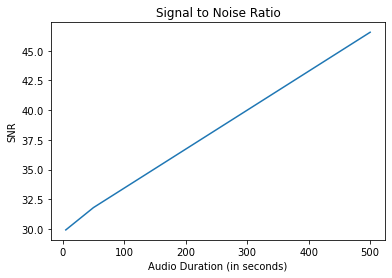

In [1030]:
x_axis = [5, 50, 500]
y_axis = [abs(snr1), abs(snr2), abs(snr3)]

plt.plot(x_axis, y_axis)
plt.title('Signal to Noise Ratio')
plt.xlabel('Audio Duration (in seconds)')
plt.ylabel('SNR')
plt.show()

In [1031]:
from IPython.core.display import HTML

HTML("<p style='font-size:36px'>Triple DES</p>")

Text(0.5, 1.0, 'Original Audio Plot')

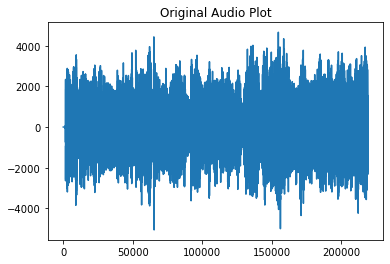

In [1032]:
from Cryptodome.Cipher import DES3
fs, data = wavfile.read('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/originals/clip1.wav')
plt.plot(data)            
plt.title("Original Audio Plot")

In [1033]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/originals/clip1.wav', 'rb') as fd:
    contents = fd.read()
from Cryptodome.Random import get_random_bytes
TDES_KEY = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(24))  
TDES_IV = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(8))
print(f"The key for the Triple DES = {TDES_KEY}") 
print(f"The initialization vector for the Triple DES = {TDES_IV}") 

The key for the Triple DES = DLZDadb2Brne6QawnISax2Rs
The initialization vector for the Triple DES = 5R6qgWbA


In [1034]:
start = time.time()
encryptor = DES3.new(TDES_KEY.encode("utf-8"), DES3.MODE_CFB, TDES_IV.encode("utf-8"))
tdes_encrypted_audio1 = encryptor.encrypt(contents)
tdes_encrypt_duration1 = time.time() - start
print(f"File has been encrypted in {tdes_encrypt_duration1*1000} milliseconds")

File has been encrypted in 112.54358291625977 milliseconds


In [1035]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/triple DES/encrypted/enc_1.wav', 'wb') as fd:
    fd.write(tdes_encrypted_audio1)
print("The encrypted file has been generated in the Triple DES/encrypted directory.")

The encrypted file has been generated in the Triple DES/encrypted directory.


In [1036]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/Triple DES/encrypted/enc_1.wav', 'rb') as fd:
    contents = fd.read()
start = time.time()
decryptor = DES3.new(TDES_KEY.encode("utf-8"), DES3.MODE_CFB, TDES_IV.encode("utf-8"))
tdes_decrypted_audio1 = decryptor.decrypt(contents)
tdes_decrypt_duration1 = time.time() - start
print(f"File has been decrypted in {tdes_decrypt_duration1*1000} milliseconds")

File has been decrypted in 111.5727424621582 milliseconds


In [1037]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/Triple DES/decrypted/denc_1.wav', 'wb') as fd:
    fd.write(tdes_decrypted_audio1)
print("The encrypted file has been generated in the Triple DES/decrypted directory.")

The encrypted file has been generated in the Triple DES/decrypted directory.


Encryption time:  112.54358291625977 milliseconds
Decryption time:  111.5727424621582 milliseconds


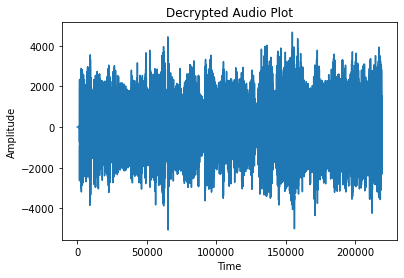

In [1038]:
fs, data = wavfile.read('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/Triple DES/decrypted/denc_1.wav')
plt.plot(data)  
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Decrypted Audio Plot")
data_1 = np.asarray(data, dtype = np.int32)
print("Encryption time: ", tdes_encrypt_duration1*1000, "milliseconds")
print("Decryption time: ", tdes_decrypt_duration1*1000, "milliseconds")

Text(0.5, 1.0, 'Original Audio Plot')

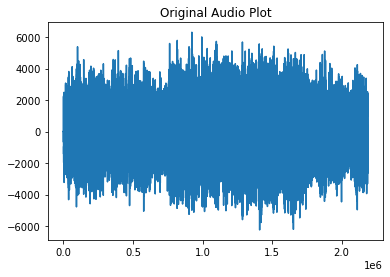

In [1039]:
fs, data = wavfile.read('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/originals/clip2.wav')
plt.plot(data)            
plt.title("Original Audio Plot")

In [1040]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/originals/clip2.wav', 'rb') as fd:
    contents = fd.read()
from Cryptodome.Random import get_random_bytes
TDES_KEY = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(24))  
TDES_IV = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(8))
print(f"The key for the Triple DES = {TDES_KEY}") 
print(f"The initialization vector for the Triple DES = {TDES_IV}")

The key for the Triple DES = eEPuLXA77BE8pzDFSZRPLgSk
The initialization vector for the Triple DES = Zt7AANpr


In [1041]:
start = time.time()
encryptor = DES3.new(TDES_KEY.encode("utf-8"), DES3.MODE_CFB, TDES_IV.encode("utf-8"))
tdes_encrypted_audio2 = encryptor.encrypt(contents)
tdes_encrypt_duration2 = time.time() - start
print(f"File has been encrypted in {tdes_encrypt_duration2*1000} milliseconds")

File has been encrypted in 1122.535228729248 milliseconds


In [1042]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/triple DES/encrypted/enc_2.wav', 'wb') as fd:
    fd.write(tdes_encrypted_audio2)
print("The encrypted file has been generated in the Triple DES/encrypted directory.")

The encrypted file has been generated in the Triple DES/encrypted directory.


In [1043]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/Triple DES/encrypted/enc_2.wav', 'rb') as fd:
    contents = fd.read()
start = time.time()
decryptor = DES3.new(TDES_KEY.encode("utf-8"), DES3.MODE_CFB, TDES_IV.encode("utf-8"))
tdes_decrypted_audio2 = decryptor.decrypt(contents)
tdes_decrypt_duration2 = time.time() - start
print(f"File has been decrypted in {tdes_decrypt_duration2*1000} milliseconds")

File has been decrypted in 1106.032371520996 milliseconds


In [1044]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/Triple DES/decrypted/denc_2.wav', 'wb') as fd:
    fd.write(tdes_decrypted_audio2)
print("The encrypted file has been generated in the Triple DES/decrypted directory.")

The encrypted file has been generated in the Triple DES/decrypted directory.


Encryption time:  1122.535228729248 milliseconds
Decryption time:  1106.032371520996 milliseconds


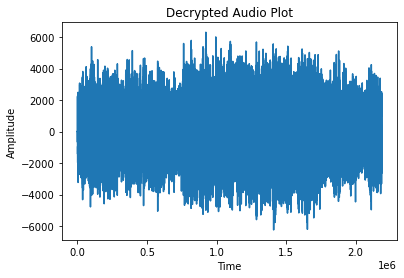

In [1045]:
fs, data = wavfile.read('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/Triple DES/decrypted/denc_2.wav')
plt.plot(data)  
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Decrypted Audio Plot")
data_1 = np.asarray(data, dtype = np.int32)
print("Encryption time: ", tdes_encrypt_duration2*1000, "milliseconds")
print("Decryption time: ", tdes_decrypt_duration2*1000, "milliseconds")

In [1046]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/originals/clip3.wav', 'rb') as fd:
    contents = fd.read()
from Cryptodome.Random import get_random_bytes
TDES_KEY = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(24))  
TDES_IV = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(8))
print(f"The key for the Triple DES = {TDES_KEY}") 
print(f"The initialization vector for the Triple DES = {TDES_IV}")

The key for the Triple DES = 5jUue1JTwagDbDHme2ZjgBH0
The initialization vector for the Triple DES = 9LjbECoE


In [1047]:
start = time.time()
encryptor = DES3.new(TDES_KEY.encode("utf-8"), DES3.MODE_CFB, TDES_IV.encode("utf-8"))
tdes_encrypted_audio3 = encryptor.encrypt(contents)
tdes_encrypt_duration3 = time.time() - start
print(f"File has been encrypted in {tdes_encrypt_duration3*1000} milliseconds")

File has been encrypted in 11349.314451217651 milliseconds


In [1048]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/triple DES/encrypted/enc_3.wav', 'wb') as fd:
    fd.write(tdes_encrypted_audio3)
print("The encrypted file has been generated in the Triple DES/encrypted directory.")

The encrypted file has been generated in the Triple DES/encrypted directory.


In [1049]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/Triple DES/encrypted/enc_3.wav', 'rb') as fd:
    contents = fd.read()
start = time.time()
decryptor = DES3.new(TDES_KEY.encode("utf-8"), DES3.MODE_CFB, TDES_IV.encode("utf-8"))
tdes_decrypted_audio3 = decryptor.decrypt(contents)
tdes_decrypt_duration3 = time.time() - start
print(f"File has been decrypted in {tdes_decrypt_duration3*1000} milliseconds")

File has been decrypted in 11272.318363189697 milliseconds


In [1050]:
with open('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/Triple DES/decrypted/denc_3.wav', 'wb') as fd:
    fd.write(tdes_decrypted_audio3)
print("The encrypted file has been generated in the Triple DES/decrypted directory.")

The encrypted file has been generated in the Triple DES/decrypted directory.


Encryption time:  11349.314451217651 milliseconds
Decryption time:  11272.318363189697 milliseconds


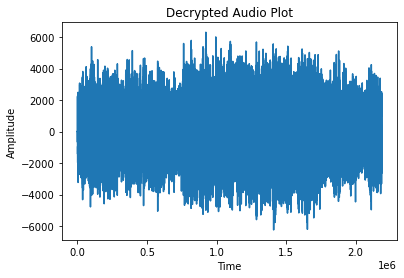

In [1051]:
fs, data = wavfile.read('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/Triple DES/decrypted/denc_2.wav')
plt.plot(data)  
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Decrypted Audio Plot")
data_1 = np.asarray(data, dtype = np.int32)
print("Encryption time: ", tdes_encrypt_duration3*1000, "milliseconds")
print("Decryption time: ", tdes_decrypt_duration3*1000, "milliseconds")

In [1052]:
filename = 'C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/Triple DES/decrypted/denc_1.wav'
sample_rate, signal = wavfile.read(filename)

signal_power = np.sum(signal ** 2) / len(signal)

noise = signal - np.mean(signal)
noise_power = np.sum(noise ** 2) / len(noise)

snr1 = 10 * np.log10(abs(signal_power)/ noise_power)

print("The Signal to Noise Ratio of the Decrypted Audio Clip 1 is: ", snr1)

The Signal to Noise Ratio of the Decrypted Audio Clip 1 is:  -29.918036263668803


In [1053]:
filename = 'C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/Triple DES/decrypted/denc_2.wav'
sample_rate, signal = wavfile.read(filename)

signal_power = np.sum(signal ** 2) / len(signal)

noise = signal - np.mean(signal)
noise_power = np.sum(noise ** 2) / len(noise)

snr2 = 10 * np.log10(abs(signal_power)/ noise_power)

print("The Signal to Noise Ratio of the Decrypted Audio Clip 2 is: ", snr2)

The Signal to Noise Ratio of the Decrypted Audio Clip 2 is:  -31.79753226595519


In [1054]:
filename = 'C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/Triple DES/decrypted/denc_3.wav'
sample_rate, signal = wavfile.read(filename)

signal_power = np.sum(signal ** 2) / len(signal)

noise = signal - np.mean(signal)
noise_power = np.sum(noise ** 2) / len(noise)

snr3 = 10 * np.log10(abs(signal_power)/ noise_power)

print("The Signal to Noise Ratio of the Decrypted Audio Clip 3 is: ", snr3)

The Signal to Noise Ratio of the Decrypted Audio Clip 3 is:  -46.55742197044441


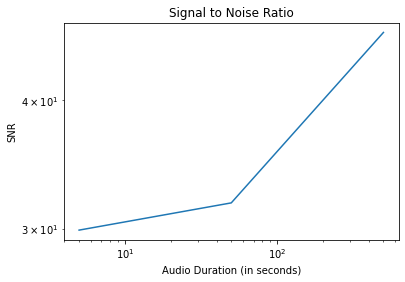

In [1055]:
x_axis = [5, 50, 500]
y_axis = [abs(snr1), abs(snr2), abs(snr3)]

plt.plot(x_axis, y_axis)
plt.title('Signal to Noise Ratio')
plt.xlabel('Audio Duration (in seconds)')
plt.ylabel('SNR')
plt.xscale('log')
plt.yscale('log')
plt.show()

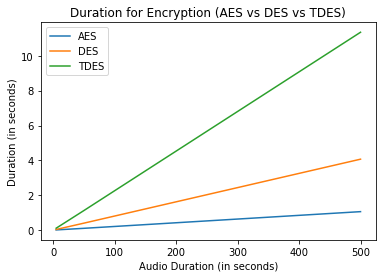

In [1056]:
x_axis = [5, 50, 500]
aes_encrypt_y_axis = [encrypt_duration1, encrypt_duration2, encrypt_duration3]
des_encrypt_y_axis = [des_encrypt_duration1, des_encrypt_duration2, des_encrypt_duration3]
tdes_encrypt_y_axis = [tdes_encrypt_duration1, tdes_encrypt_duration2, tdes_encrypt_duration3]

plt.plot(x_axis, aes_encrypt_y_axis, label='AES')
plt.plot(x_axis, des_encrypt_y_axis, label='DES')
plt.plot(x_axis, tdes_encrypt_y_axis, label='TDES')
plt.title('Duration for Encryption (AES vs DES vs TDES)')
plt.xlabel('Audio Duration (in seconds)')
plt.ylabel('Duration (in seconds)')
plt.legend()
plt.show()

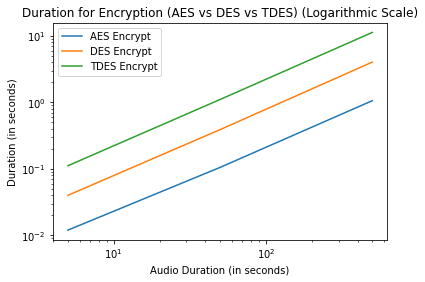

In [1057]:
x_axis = [5, 50, 500]
aes_encrypt_y_axis = [decrypt_duration1, decrypt_duration2, decrypt_duration3]
des_encrypt_y_axis = [des_decrypt_duration1, des_decrypt_duration2, des_decrypt_duration3]
tdes_encrypt_y_axis = [tdes_decrypt_duration1, tdes_decrypt_duration2, tdes_decrypt_duration3]

plt.plot(x_axis, aes_encrypt_y_axis, label='AES Encrypt')
plt.plot(x_axis, des_encrypt_y_axis, label='DES Encrypt')
plt.plot(x_axis, tdes_encrypt_y_axis, label='TDES Encrypt')
plt.title('Duration for Encryption (AES vs DES vs TDES) (Logarithmic Scale)')
plt.xlabel('Audio Duration (in seconds)')
plt.ylabel('Duration (in seconds)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()


In [1058]:
from pystoi import stoi

original, fs = sf.read('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/originals/clip1.wav')
processed, fs = sf.read('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/decrypted/denc_1.wav')

# Clean and den should have the same length, and be 1D
d = stoi(original, processed, fs, extended=False)
print(f"Value of STOI for clip 1: {d}")

Value of STOI for clip 1: 0.9999999999999997


In [1059]:
clean, fs = sf.read('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/originals/clip1.wav')
denoised, fs = sf.read('C:/Users/Pratik Panda/OneDrive/Desktop/Data Privacy/decrypted/denc_1.wav')

# Clean and den should have the same length, and be 1D
d = stoi(clean, denoised, fs, extended=False)
print(f"Value of STOI for clip 1: {d}")


Value of STOI for clip 1: 0.9999999999999997
